In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [3]:
train["Age"] = train["Age"].fillna(train["Age"].median())

In [4]:
# hyper parameter 
learning_rate = 0.000002
iteration = 100000

In [5]:
# math equation
def sigmoid(theta, data):
    result = 1.0 / (1 + np.exp(-theta.dot(data.T)))
    return result

In [6]:
train.loc[train["Sex"] == 'male', "Sex"] = 0
train.loc[train["Sex"] == 'female', "Sex"] = 1
train["Sex"] = train["Sex"].fillna(train["Sex"].mode()[0])

In [7]:
SELECTED_FEATURES = ['Sex', 'Age']
        
data = np.array(train[["Sex", "Age"]].values, dtype=np.float)
data.shape

(891, 2)

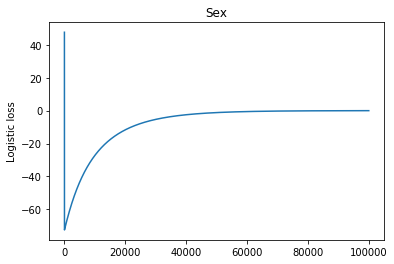

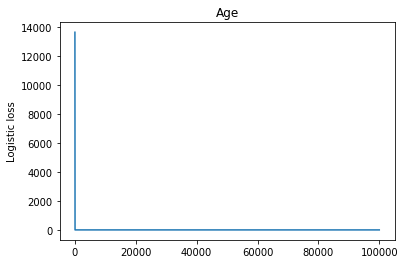

In [9]:
# Initialize weights
mu, sigma = (0, 1)
theta = np.random.normal(mu, sigma, (1, 2))

y = np.array(train[["Survived"]].values, dtype=np.float)
y = y.reshape(1, y.shape[0])

# gradient update weights
loss_list = [[], []]
for itr in range(iteration):

    # logistic regression approach
    update_weight = (y - sigmoid(theta, data)).dot(data)
    
    theta += learning_rate * update_weight
    
    for i in range(len(loss_list)):
        loss_list[i].append(-update_weight[0][i])

#plot graph   
for i in range(len(loss_list)):
    axis_x = range(len(loss_list[i]))
    plt.plot(axis_x, loss_list[i])
    plt.ylabel('Logistic loss')
    plt.title(SELECTED_FEATURES[i])
    if (i == 3):
        plt.xlabel('#iterations')
    plt.show()

In [10]:
def predict(theta, data):
    result = 1.0 / (1 + np.exp(-theta.dot(data.T)))
    return np.around(result)
x = np.array([1,2,3])
1.0 / (1 + np.exp(x))

array([0.26894142, 0.11920292, 0.04742587])

In [11]:
## PREPROCESS TESTING DATA
test["Age"] = test["Age"].fillna(test["Age"].median())

# Sex
test.loc[test["Sex"] == 'male', "Sex"] = 0
test.loc[test["Sex"] == 'female', "Sex"] = 1
test["Sex"] = test["Sex"].fillna(test["Sex"].mode()[0])

In [13]:
test_data = np.array(test[["Sex", "Age"]].values, dtype=np.float)
test_data.shape
print(theta)
print(theta.shape)
print(data.T.shape)

[[ 2.24289995 -0.04031986]]
(1, 2)
(2, 891)


In [14]:
prediction = predict(theta, test_data)
display_prediction = prediction.astype(np.int)
num_result = prediction.shape[1]
print('Passenger,Survived')
for i in range(prediction.shape[1]):
    print(str(test["PassengerId"][i]) + "," + str(display_prediction[0][i]))
print(test["PassengerId"].shape)
print(test_data.shape)

Passenger,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,1
912,0
913,0
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,1
925,1
926,0
927,0
928,1
929,1
930,0
931,0
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,0
941,1
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,0
957,1
958,1
959,0
960,0
961,0
962,1
963,0
964,1
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,0
973,0
974,0
975,0
976,0
977,0
978,1
979,1
980,1
981,0
982,1
983,0
984,1
985,0
986,0
987,0
988,0
989,0
990,1
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,0
1007,0
1008,0
1009,1
1010,0
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,1
1025,0
1026,0
1027,0
1028,0
1029,0
1030,1
1031,0
1032,1
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,1
1046,0
1047

In [15]:
mse = np.square(np.sum(display_prediction - theta.dot(test_data.T),axis=1)) / display_prediction.shape[1] 

In [16]:
mse[0]

216.6576990113367

In [17]:
prediction = predict(theta, test_data)
display_prediction = prediction.astype(np.int)
columns = ["PassengerId", "Survived"]
ls = []
for i in range(prediction.shape[1]):
    ls.append([test["PassengerId"][i], display_prediction[0][i]])
ls = np.array(ls)
df = pd.DataFrame(ls, columns=columns)
df.to_csv('logistic_regression_2_feature_Sex_Age.csv', index=False)